**Import library yang digunakan**

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

**Import Dataset**

In [14]:
dataset = pd.read_csv("Social.csv")
x = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:, -1]

**Splitting the Dataset into the Training set and Test Set**

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.15, random_state = 0)

**Feautre Scaling**

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

**Training the Naive Bayes model on the Training Set**


In [17]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

**Predicting the Test Set Result**

In [18]:
y_pred = classifier.predict(x_test)

**Making the Confusion Matrix**

In [19]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

**Visualising the Training Set Results**

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


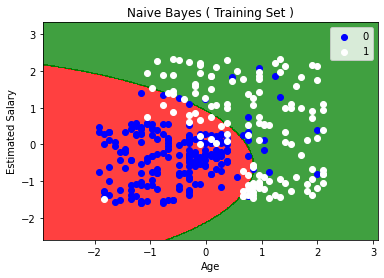

In [20]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.015),
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.015))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
              alpha = 0.75, cmap = ListedColormap(("red", "green")))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

for i, j in enumerate(np.unique(y_set)) :
  plt.scatter(x_set[y_set == j,0], x_set[y_set == j,1], 
              c = ListedColormap(("blue", "white"))(i), label = j)

plt.title("Naive Bayes ( Training Set )")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend()
plt.show()

**Visualising the Test Set Results**

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


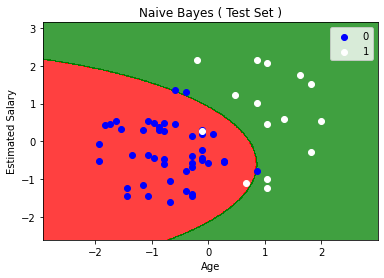

In [21]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_test, y_test
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.015),
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.015))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
              alpha = 0.75, cmap = ListedColormap(("red", "green")))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

for i, j in enumerate(np.unique(y_set)) :
  plt.scatter(x_set[y_set == j,0], x_set[y_set == j,1], 
              c = ListedColormap(("blue", "white"))(i), label = j)

plt.title("Naive Bayes ( Test Set )")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend()
plt.show()